In [1]:
# regressor k liye hai ye

In [2]:
from sklearn.svm import SVR 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

In [3]:
n_samples, n_features= 10, 5

In [4]:
r= np.random.RandomState(0)

In [5]:
y = r.randn(n_samples)

In [6]:
X= r.randn(n_samples,n_features)

In [7]:
X

array([[ 0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323],
       [ 0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574],
       [-2.55298982,  0.6536186 ,  0.8644362 , -0.74216502,  2.26975462],
       [-1.45436567,  0.04575852, -0.18718385,  1.53277921,  1.46935877],
       [ 0.15494743,  0.37816252, -0.88778575, -1.98079647, -0.34791215],
       [ 0.15634897,  1.23029068,  1.20237985, -0.38732682, -0.30230275],
       [-1.04855297, -1.42001794, -1.70627019,  1.9507754 , -0.50965218],
       [-0.4380743 , -1.25279536,  0.77749036, -1.61389785, -0.21274028],
       [-0.89546656,  0.3869025 , -0.51080514, -1.18063218, -0.02818223],
       [ 0.42833187,  0.06651722,  0.3024719 , -0.63432209, -0.36274117]])

In [8]:
y

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ])

In [9]:
model = make_pipeline(StandardScaler(), SVR())

In [10]:
model.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])

In [11]:
model.predict(X)

array([ 0.80185075,  0.50050052,  0.93341268,  1.67234653,  0.89082705,
        0.28538774,  0.8504317 , -0.05156277,  0.3322631 ,  0.31011751])

In [12]:
y

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ])

In [13]:
dataset=pd.read_csv('Position_Salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [14]:
# input
X=dataset.iloc[:,1:2].values
X.shape

(10, 1)

In [15]:
y=dataset.iloc[:,2].values
y.shape

(10,)

In [16]:
# preprocessing
#train + test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [17]:
X_train,y_train

(array([[ 5],
        [10],
        [ 2],
        [ 7],
        [ 8],
        [ 4],
        [ 1],
        [ 6]], dtype=int64),
 array([ 110000, 1000000,   50000,  200000,  300000,   80000,   45000,
         150000], dtype=int64))

In [18]:
X_test,y_test

(array([[3],
        [9]], dtype=int64),
 array([ 60000, 500000], dtype=int64))

In [19]:
# scale 
from sklearn.preprocessing import StandardScaler

In [20]:
sc_X = StandardScaler()
sc_Y = StandardScaler()

In [21]:
X = sc_X.fit_transform(X)

In [22]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [25]:
type(y)

numpy.ndarray

In [39]:
y = sc_Y.fit_transform(y.reshape(-1,1))

In [40]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [42]:
# SVR support vector regressor
from sklearn.svm import SVR

In [43]:
regressor = SVR (kernel='rbf')

In [44]:
regressor.fit(X,y)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [45]:
y_pred = regressor.predict(sc_X.transform(np.array([[6.5]])))

In [46]:
y_pred

array([-0.27861589])

In [52]:
y_pred = sc_Y.inverse_transform(y_pred.reshape(-1,1))

In [53]:
y_pred

array([[1.10850097e+27]])

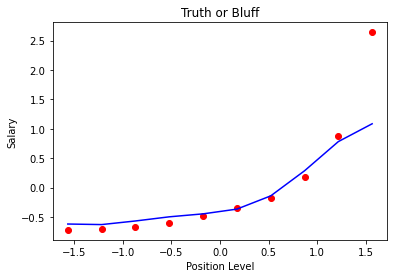

In [59]:
# visualize
import matplotlib.pyplot as plt
plt.scatter(X,y,c='red')
plt.plot(X,regressor.predict(X),c='blue')
plt.title('Truth or Bluff')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()